In [3]:
import torch 
from matplotlib import pyplot as plt 
from tkgdti.train.utils import device_and_data_loading
import argparse 
from tkgdti.data.TriplesDatasetGNN import TriplesDatasetGNN
from tkgdti.data.process_graph import process_graph
import torch_geometric as pyg
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.calibration import calibration_curve 
import seaborn as sbn 

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss
from scipy.stats import rankdata
import os 
from tkgdti.eval.evaluate import evaluate

/home/teddy/miniconda3/envs/tkgdti/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset = 'tkg/COMPLEX2/' # complex2
k=10 

pred_ls = []
for fold in range(k):
    uid = [x for x in os.listdir(f'../output/{dataset}/FOLD_{fold}/') if os.path.isdir(f'../output/{dataset}/FOLD_{fold}/{x}')][0]
    preds = pd.read_csv(f'../output/{dataset}/FOLD_{fold}/{uid}/predictions.csv')
    test_metrics = f'../output/{dataset}/FOLD_{fold}/{uid}/test_metrics.csv'
    preds = preds.assign(fold=fold)
    pred_ls.append(preds)
    

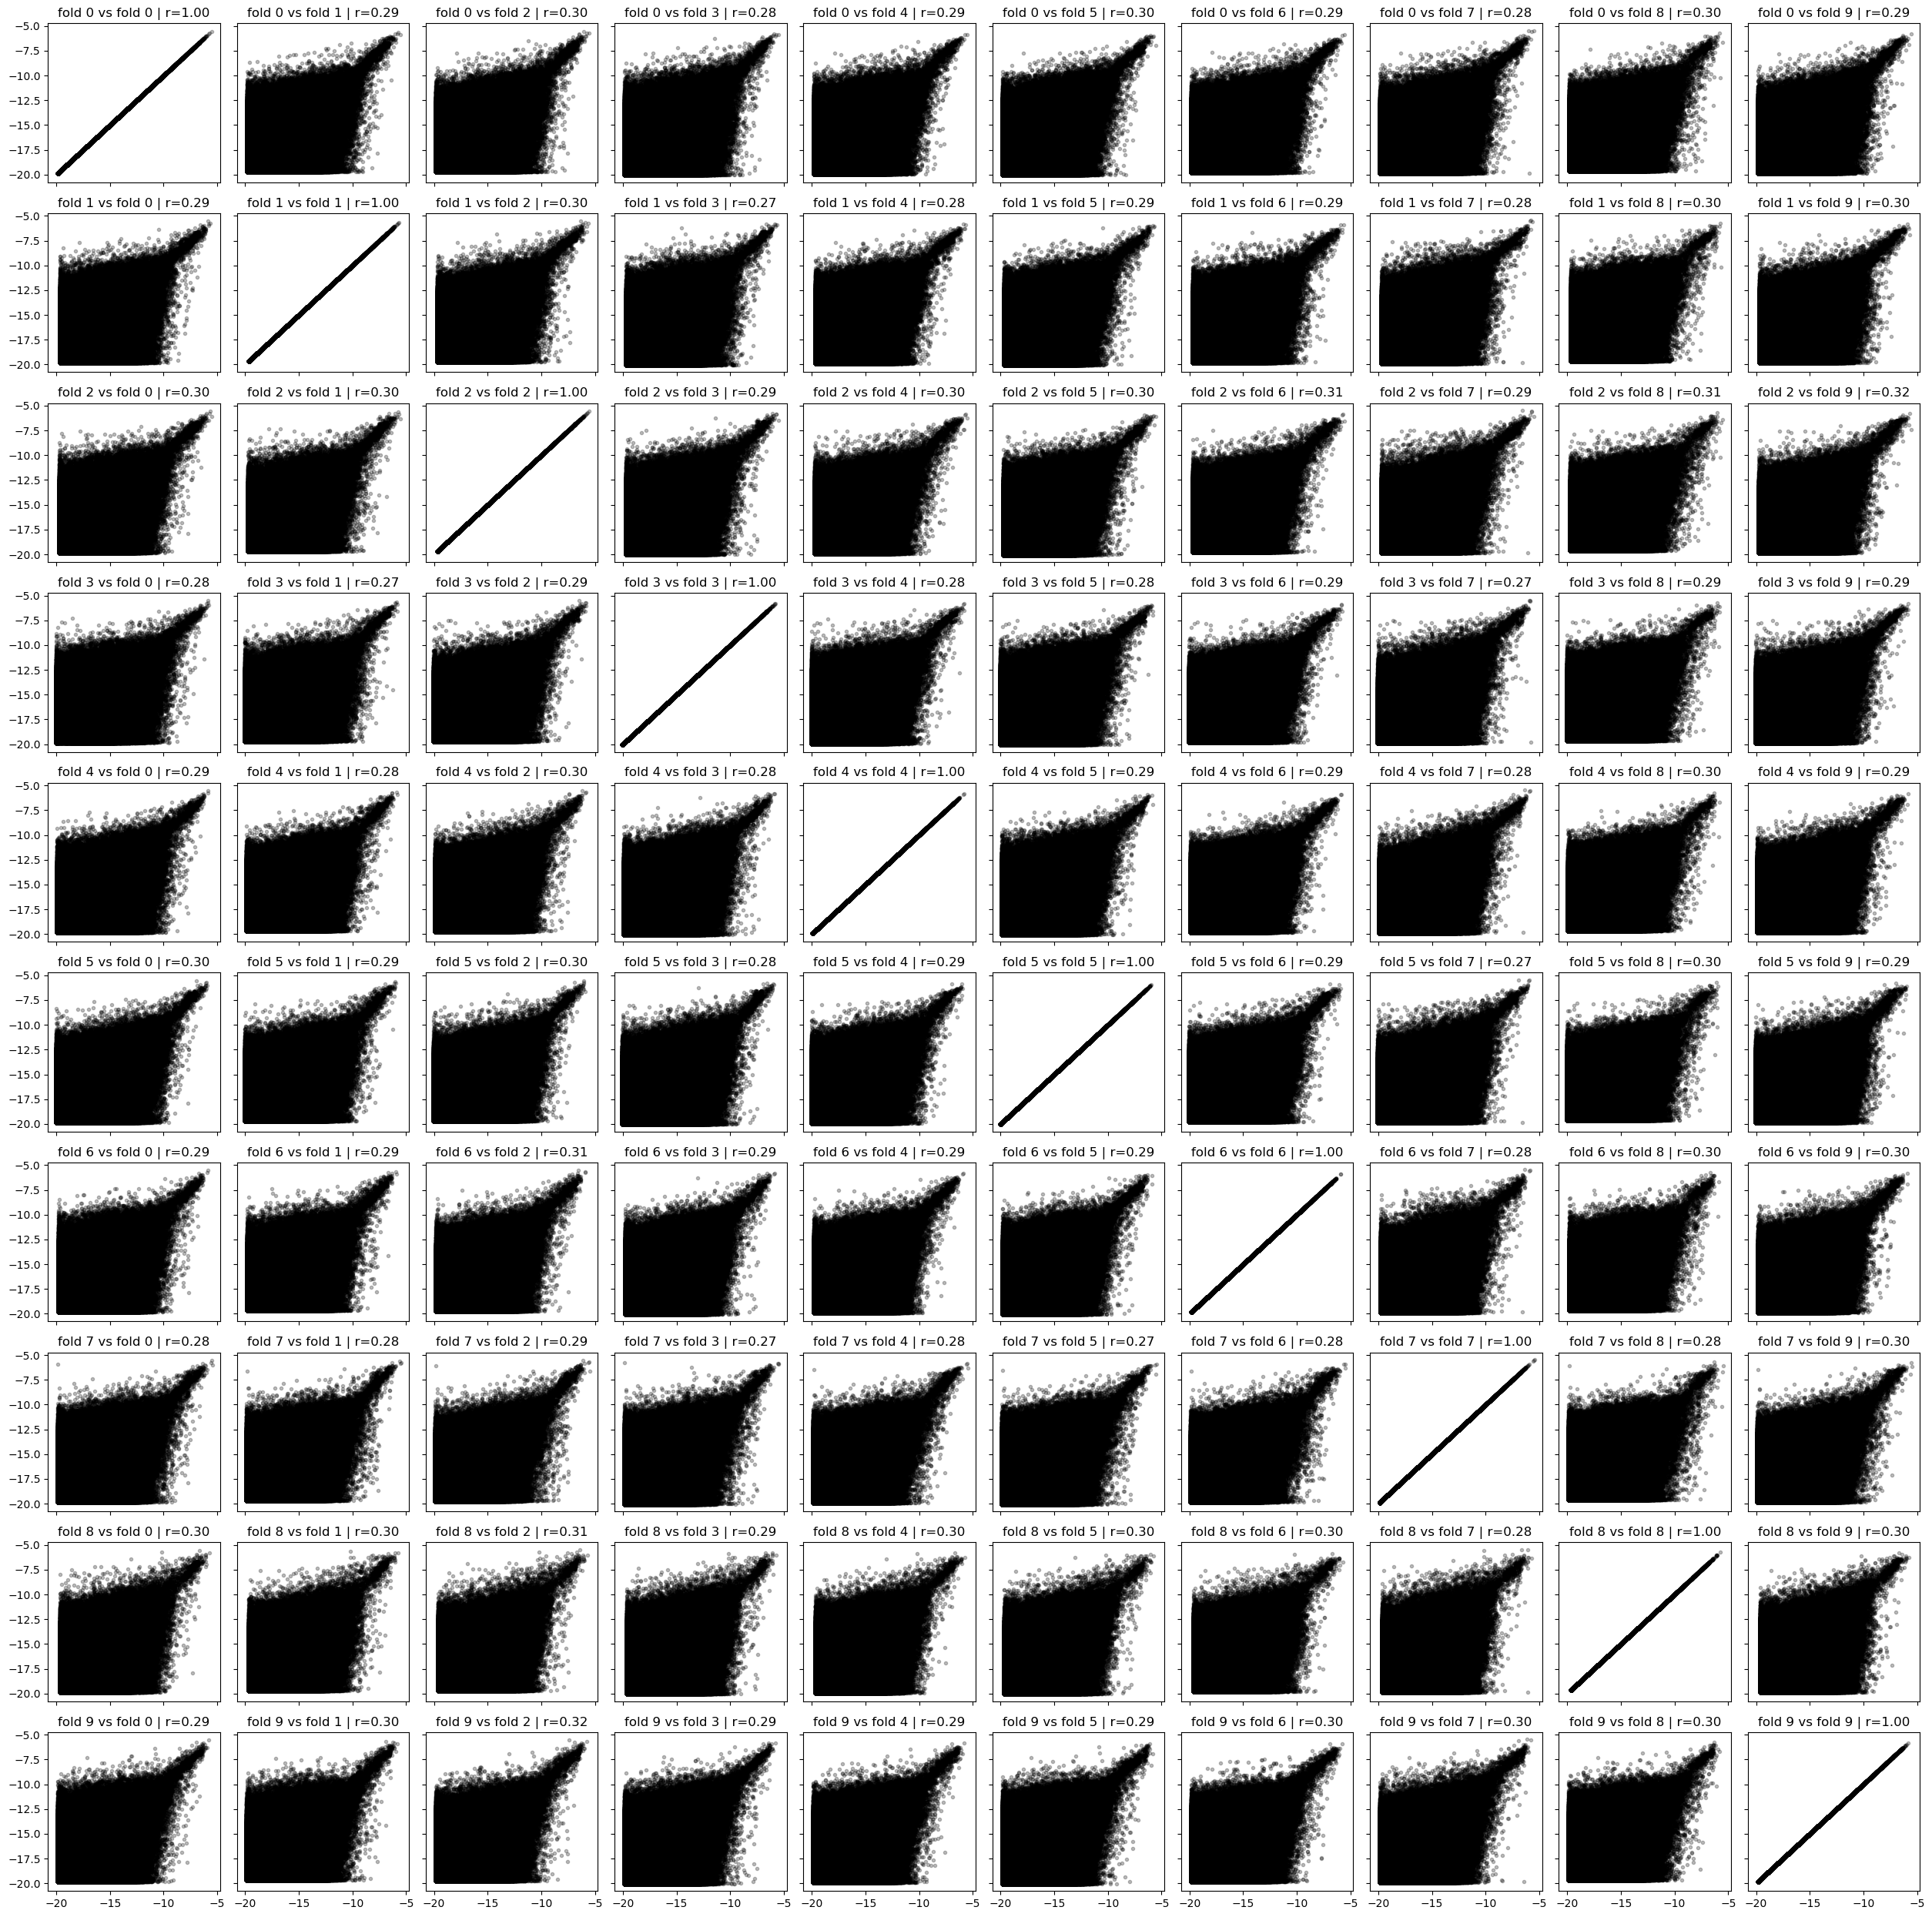

In [5]:
f,axes = plt.subplots(10,10, figsize=(25,25), sharex=True, sharey=True)

for i in range(10):
    for j in range(10):
            print('progress: ', i, j, end='\r')
            axes[i,j].plot(pred_ls[i]['score'], pred_ls[j]['score'], 'k.', alpha=0.25)
            axes[i,j].set_title(f'fold {i} vs fold {j} | r={np.corrcoef(pred_ls[i]["score"], pred_ls[j]["score"])[0,1]:.2f}')

plt.tight_layout()
plt.show()


In [4]:
preds2 = pd.read_csv('/home/teddy/local/TKG-DTI/output/tkg/COMPLEX2/FOLD_0/158198c6-1947-40f4-ad62-4ab94a0f3163/predictions.csv')
preds2.head()

,drug,protein,score,drug_name,prot_name,train,valid,test,negatives,prob
0,0,0,-19.014920,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A,False,False,False,True,0.057351
1,0,1,-17.755966,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A1BG,False,False,False,True,0.145373
2,0,2,-15.308866,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A1CF,False,False,False,True,0.316466
3,0,3,-15.661852,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A2M,False,False,False,True,0.291786
4,0,4,-15.957707,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A3GALT2,False,False,False,True,0.271101


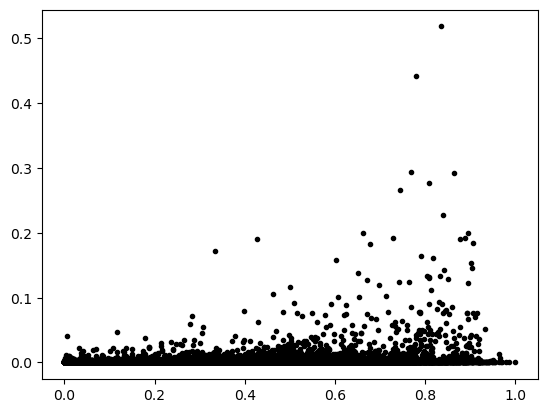

In [5]:
plt.figure()
plt.plot(preds2['prob'], pred_ls[0]['prob'], 'k.')
plt.show()

In [6]:
np.corrcoef(preds2['prob'], pred_ls[0]['prob'])[0,1]

0.05681522933587592

In [11]:
np.corrcoef(preds2['score'], pred_ls[4]['score'])[0,1]

0.06701099492101197